In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from shapely.geometry import Point
import geopandas as gpd
import contextily as ctx

In [19]:
dtypes = {'user_type':str, 'bike_share_for_all_trip':str, 'rental_access_method':str}

data = pd.read_csv('../201912-baywheels-tripdata.csv')

In [20]:
data

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,66600,2019-12-31 14:28:50.2860,2020-01-01 08:58:51.2500,364.0,China Basin St at 3rd St,37.772000,-122.389970,349.0,Howard St at Mary St,37.781010,-122.405666,12085,Customer,NaN
1,36526,2019-12-31 21:52:47.7620,2020-01-01 08:01:33.9320,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,410.0,Illinois St at Cesar Chavez St,37.750200,-122.386567,9477,Customer,NaN
2,8164,2019-12-31 23:50:04.8770,2020-01-01 02:06:09.4140,14.0,Clay St at Battery St,37.795001,-122.399970,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,10420,Customer,NaN
3,8163,2019-12-31 23:49:21.4000,2020-01-01 02:05:24.6670,14.0,Clay St at Battery St,37.795001,-122.399970,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2065,Customer,NaN
4,6847,2019-12-31 22:51:05.6850,2020-01-01 00:45:13.4860,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,10219,Customer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150097,731,2019-12-28 18:37:29,2019-12-28 18:49:40,NaN,NaN,37.809731,-122.409855,NaN,NaN,37.807573,-122.421681,719651,Subscriber,app
150098,748,2019-12-28 18:37:24,2019-12-28 18:49:53,NaN,NaN,37.809768,-122.409797,NaN,NaN,37.807558,-122.421638,655411,Subscriber,app
150099,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,NaN,NaN,37.810183,-122.410271,NaN,NaN,37.807225,-122.408850,936881,Subscriber,app
150100,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NaN,NaN,37.810471,-122.417386,NaN,NaN,37.803143,-122.414373,397539,Subscriber,app


In [21]:
data.start_station_id.nunique()

421

<AxesSubplot:>

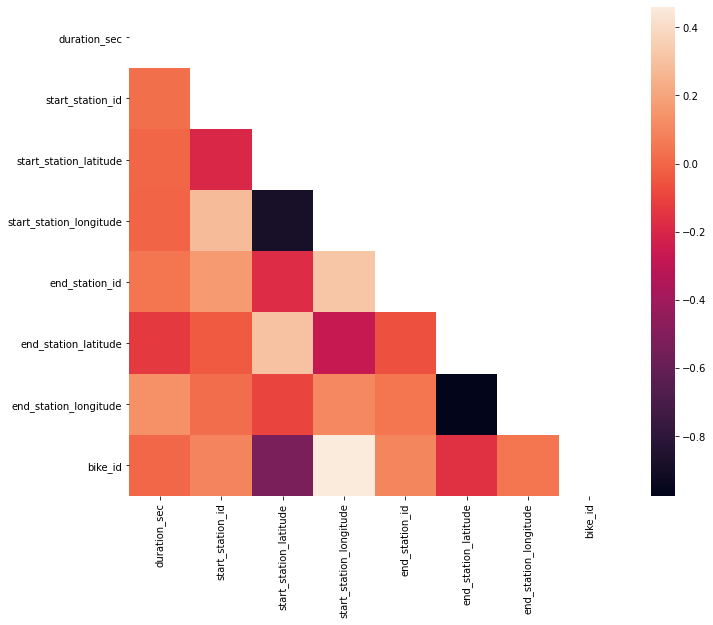

In [20]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask = mask)

/home/joshuapjacob/.local/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)
/tmp/ipykernel_22612/3387287870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_start['geometry'] = df_start.apply(


Text(0.5, 1.0, 'Start Locations')

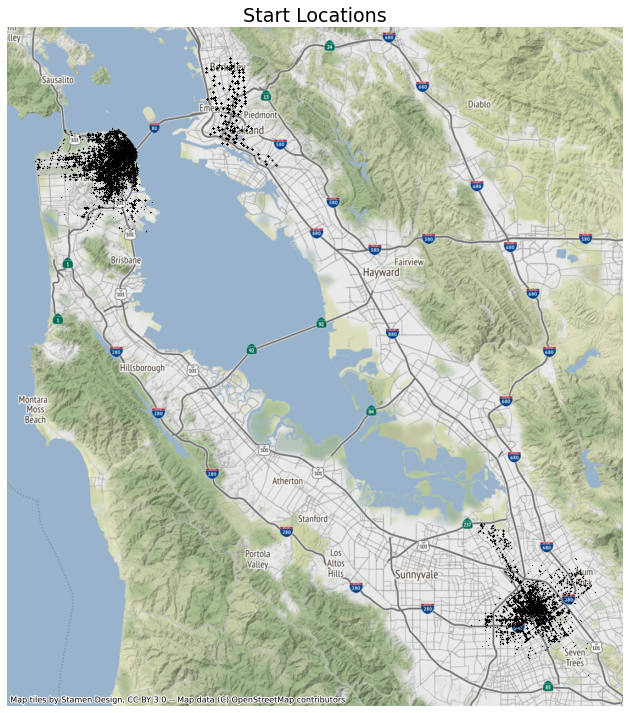

In [41]:
df_start = data[['start_station_longitude','start_station_latitude']]
df_start['geometry'] = df_start.apply(
    lambda x: Point(float(x.start_station_longitude), float(x.start_station_latitude)), axis=1
)

geo_df_start = gpd.GeoDataFrame(df_start, geometry='geometry')

geo_df_start.crs = "EPSG:4326"
geo_df_start = geo_df_start.to_crs(epsg = 3857)

sns.set_context("paper", font_scale=2)
fig, ax = plt.subplots(figsize=(10,10))
geo_df_start.plot(ax=ax, marker = '.', markersize=1, edgecolor = 'black', legend = True)
ctx.add_basemap(ax)
ax.set_axis_off()
fig.tight_layout()
plt.title("Start Locations")

/home/joshuapjacob/.local/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


Text(0.5, 1.0, 'End Locations')

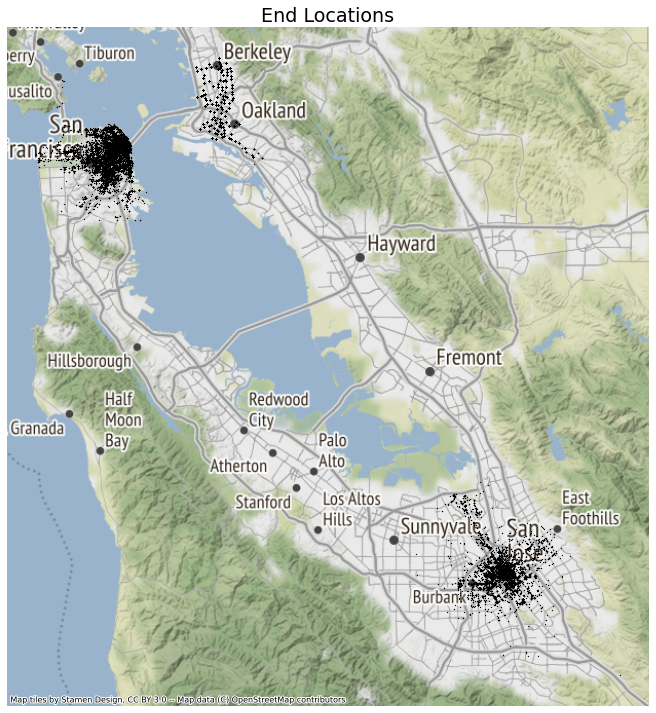

In [42]:
df_end = data[['end_station_longitude','end_station_latitude']]
df_end = df_end[df_end['end_station_longitude'] != 0]
df_end['geometry'] = df_end.apply(
    lambda x: Point(float(x.end_station_longitude), float(x.end_station_latitude)), axis=1
)

geo_df_end = gpd.GeoDataFrame(df_end, geometry='geometry')

geo_df_end.crs = "EPSG:4326"
geo_df_end = geo_df_end.to_crs(epsg = 3857)

sns.set_context("paper", font_scale=2)
fig, ax = plt.subplots(figsize=(10,10))
geo_df_end.plot(ax=ax, marker = '.', markersize=1, edgecolor = 'black', legend = True)
ctx.add_basemap(ax)
ax.set_axis_off()
fig.tight_layout()
plt.title("End Locations")

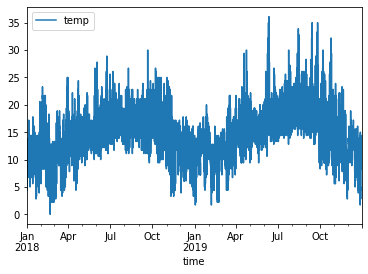

In [10]:
# https://dev.meteostat.net/python/hourly.html#example

from datetime import datetime
from meteostat import Point, Hourly

start = datetime(2018, 1, 1)
end = datetime(2019, 12, 31)

test = Point(37.772000, -122.389970)

wdata = Hourly(test, start, end)
wdata = wdata.fetch()

wdata.plot(y=['temp'])
plt.show()

In [11]:
wdata

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2018-01-01 00:00:00,13.0,9.1,77.0,NaN,NaN,280.0,7.0,NaN,1018.5,NaN,5.0
2018-01-01 01:00:00,13.3,9.4,77.0,0.0,NaN,280.0,7.6,NaN,1019.1,NaN,NaN
2018-01-01 02:00:00,12.2,9.9,86.0,0.0,NaN,340.0,7.6,NaN,1019.6,NaN,NaN
2018-01-01 03:00:00,11.1,10.0,93.0,0.0,NaN,360.0,5.4,NaN,1020.4,NaN,NaN
2018-01-01 04:00:00,11.1,10.0,93.0,0.0,NaN,340.0,7.6,NaN,1020.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 20:00:00,12.2,7.3,72.0,0.0,NaN,240.0,11.2,NaN,1020.7,NaN,2.0
2019-12-30 21:00:00,12.2,7.7,74.0,0.0,NaN,220.0,13.0,NaN,1019.9,NaN,2.0
2019-12-30 22:00:00,13.3,6.6,64.0,0.0,NaN,210.0,11.2,NaN,1019.7,NaN,2.0
